# Word and Word Vector Analysis

In [1]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#NLTK or Natural Language Toolkit imports (based on imports from lesson 5.03)
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.set_option('display.max_colwidth' ,999)

In [2]:
#CSVs with lems after tokenizing and lemmatizing
preg_df = pd.read_csv('./data//Lem_data/pregnant_lems.csv').drop(columns= 'Unnamed: 0')
parent_df = pd.read_csv('./data//Lem_data/parent_lems.csv').drop(columns= 'Unnamed: 0')

In [3]:
#creating all lem column
preg_df['all_lems'] = preg_df['title_lems'] + ' ' + preg_df['lems']
parent_df['all_lems'] = parent_df['title_lems'] + ' ' + parent_df['lems']

In [4]:
#creating word count column
preg_df['word_count'] = preg_df['all_lems'].str.split().str.len()

parent_df['word_count'] = parent_df['all_lems'].str.split().str.len()

In [5]:
preg_df.dropna(inplace=True)
parent_df.dropna(inplace=True)

In [6]:
#function found in https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
def get_top_n_words(corpus, n = None):
    cvec = CountVectorizer().fit(corpus)
    
    bag_of_words = cvec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    
    return words_freq[:n]

In [7]:
preg_common_words = get_top_n_words(preg_df['selftext'] , 20)

In [8]:
for word, freq in preg_common_words:
    print(word, freq)

and 443744
to 393038
the 345264
my 291236
it 206203
of 160273
that 136004
in 134899
is 134731
but 131548
for 131514
was 129397
so 124795
have 121080
this 115969
me 114029
just 92427
with 91551
on 87044
be 85125


In [10]:
preg_common_df = pd.DataFrame(preg_common_words, columns=['Word', 'Count'])

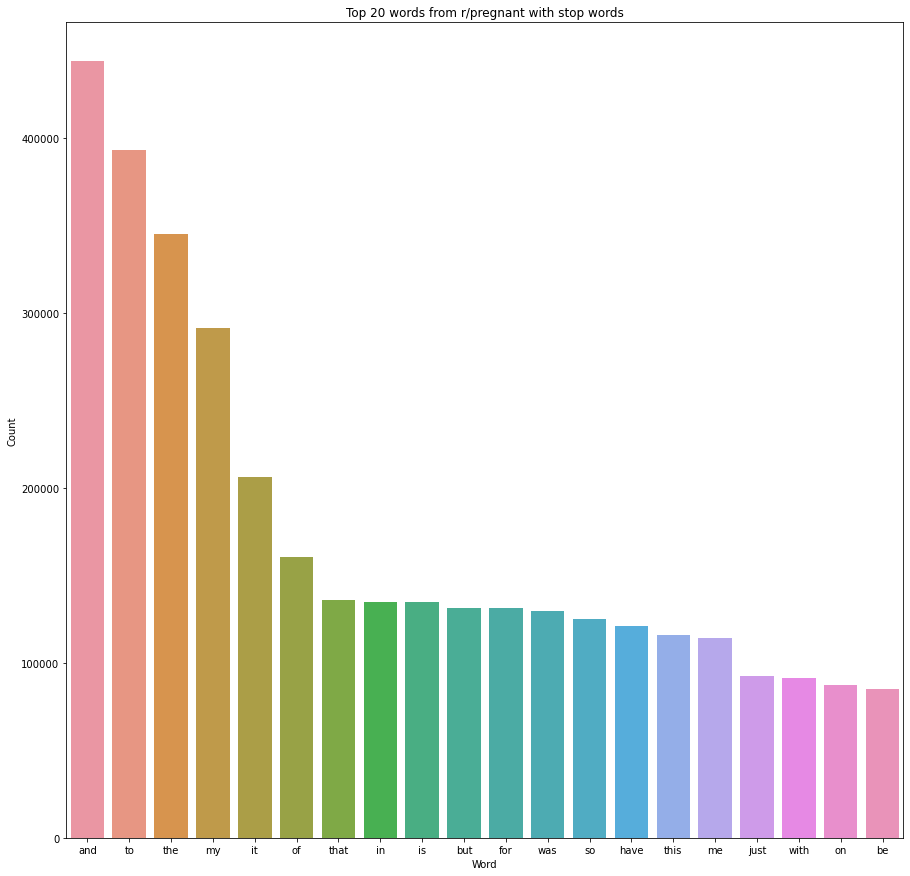

In [11]:
plt.figure(figsize=(15, 15))

sns.barplot(data= preg_common_df, x ='Word', y ='Count')

plt.title('Top 20 words from r/pregnant with stop words')

plt.savefig('top-20-pregnant-w-stop-words');

In [11]:
#function found in https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
def get_top_n_words(corpus, n = None):
    cvec = CountVectorizer(stop_words= 'english').fit(corpus)
    
    bag_of_words = cvec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    
    return words_freq[:n]

In [12]:
preg_common_words = get_top_n_words(preg_df['selftext'], 20)
for word, freq in preg_common_words:
    print(word, freq)

just 92427
baby 65957
like 63935
weeks 56701
ve 46403
pregnant 45777
feel 45203
know 44265
don 41861
pregnancy 41218
time 39606
really 33759
want 33294
going 27149
day 24945
got 23982
week 23071
having 22157
husband 21880
days 21397


In [13]:
preg_common_df = pd.DataFrame(preg_common_words, columns= ['Word', 'Count'])

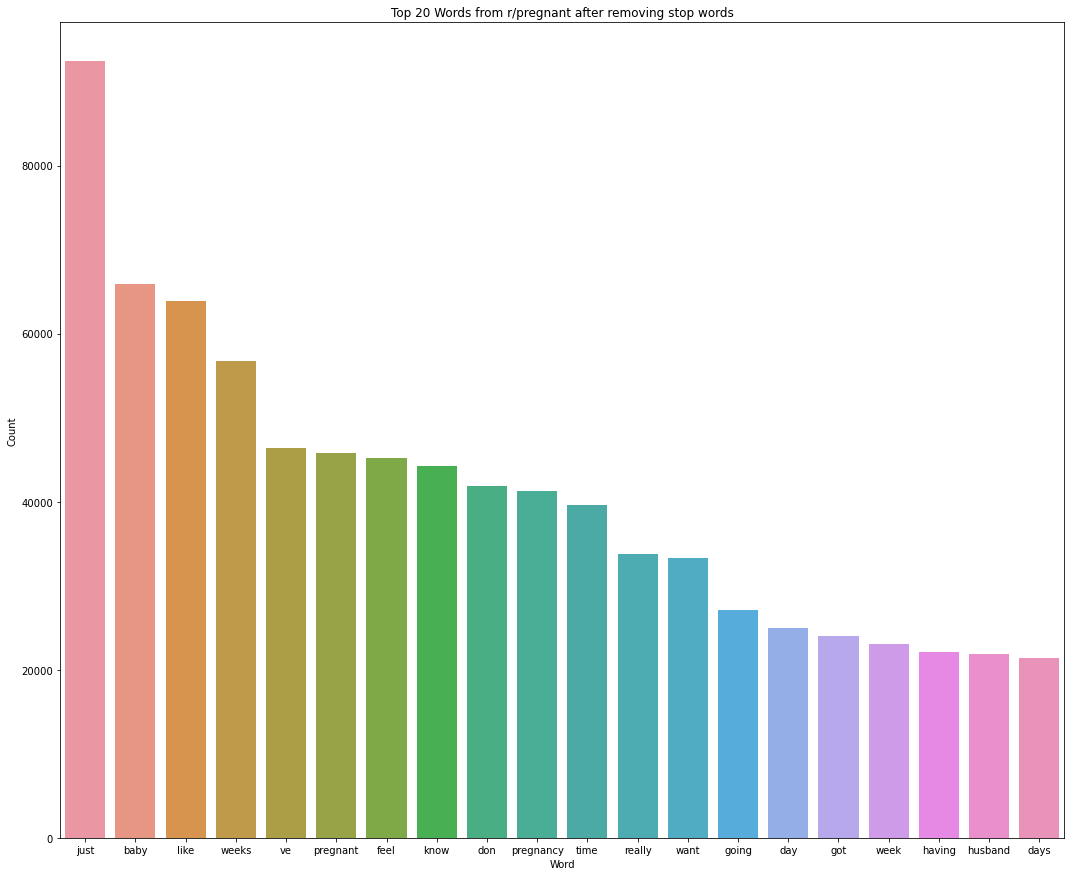

In [14]:
plt.figure(figsize=(18, 15))

sns.barplot(data= preg_common_df, x ='Word', y ='Count')

plt.title('Top 20 Words from r/pregnant after removing stop words')

plt.savefig('./Visuals/top-20-words-r-pregnant.png');

### r/parenting

In [32]:
#function found in https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
def get_top_n_words(corpus, n = None):
    cvec = CountVectorizer().fit(corpus)
    
    bag_of_words = cvec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    
    return words_freq[:n]

In [33]:
parent_common_words = get_top_n_words(parent_df['all_lems'], 20)

In [34]:
for word, freq in parent_common_words:
    print(word, freq)

to 573123
and 556881
the 439550
my 284055
it 236142
he 235216
of 213205
is 210531
she 205170
in 189764
her 189367
that 181561
for 172217
with 161718
we 155520
but 149500
have 133131
this 126650
so 113359
on 112676


In [35]:
parent_common_df = pd.DataFrame(parent_common_words, columns= ['Word', 'Count'])

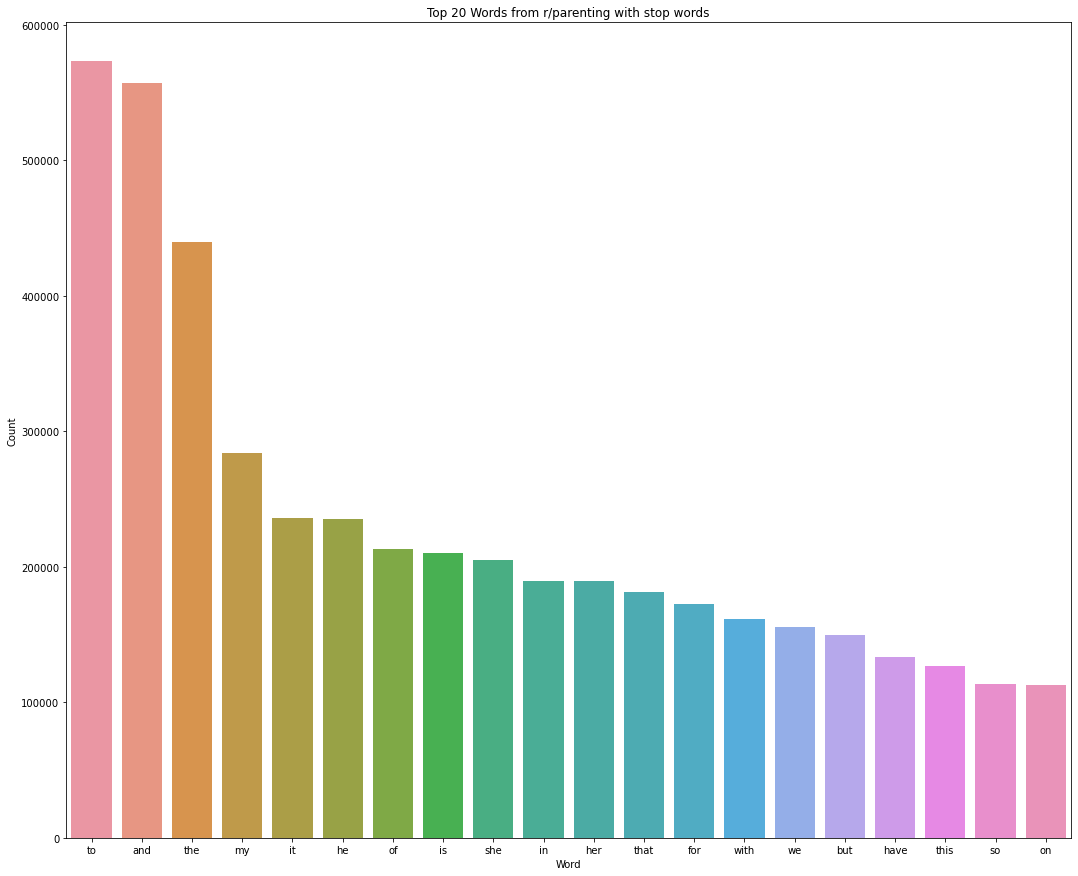

In [37]:
plt.figure(figsize=(18, 15))

sns.barplot(data= parent_common_df, x ='Word', y ='Count')

plt.title('Top 20 Words from r/parenting with stop words')

plt.savefig('top-20-parent-w-stop-words.png');

In [38]:
#function found in https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
def get_top_n_words(corpus, n = None):
    cvec = CountVectorizer(stop_words= 'english').fit(corpus)
    
    bag_of_words = cvec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    
    return words_freq[:n]

In [39]:
parent_common_words = get_top_n_words(parent_df['all_lems'], 20)

In [40]:
for word, freq in parent_common_words:
    print(word, freq)

wa 112161
just 93630
time 78172
ha 76908
like 76364
kid 75353
year 66048
old 59046
want 57232
don 56759
know 54832
child 47879
son 47522
day 46701
thing 42186
daughter 41216
parent 40548
feel 39609
ve 38320
baby 35392


In [41]:
parent_common_df = pd.DataFrame(parent_common_words, columns= ['Word', 'Count'])

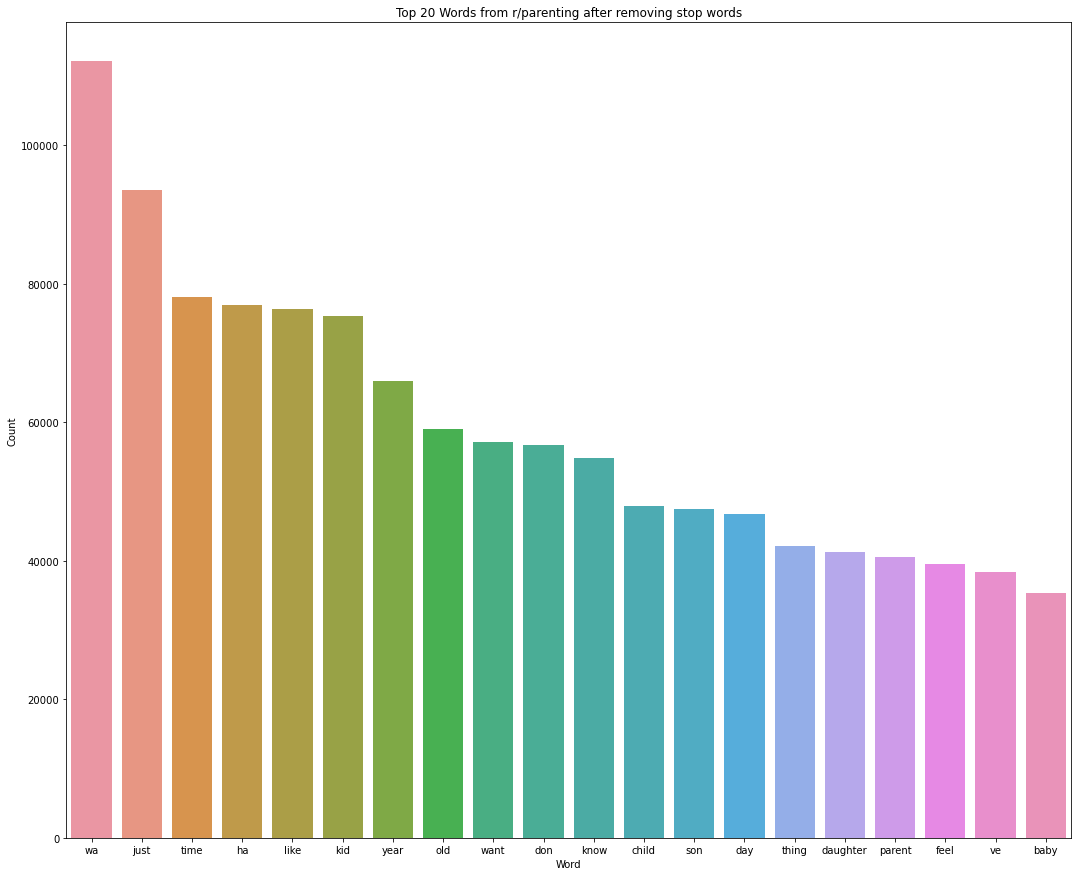

In [42]:
plt.figure(figsize=(18, 15))

sns.barplot(data= parent_common_df, x ='Word', y ='Count')

plt.title('Top 20 Words from r/parenting after removing stop words')

plt.savefig('top-20-parent.png');

In [22]:
#function found in https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
def get_top_n_bigrams(corpus, n=None):
    cvec_2 = CountVectorizer(ngram_range=(2,3)).fit(corpus)
    
    bag_of_words = cvec_2.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec_2.vocabulary_.items()]
    
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    
    return words_freq[:n]

In [23]:
preg_common_bigrams = get_top_n_bigrams(preg_df['all_lems'], 20)

In [24]:
for word, freq in preg_common_words:
    print(word, freq)

just 92427
baby 65957
like 63935
weeks 56701
ve 46403
pregnant 45777
feel 45203
know 44265
don 41861
pregnancy 41218
time 39606
really 33759
want 33294
going 27149
day 24945
got 23982
week 23071
having 22157
husband 21880
days 21397
